# Zoll Patient Monitor
## JSON Data Processing

Simo Mäkelä  
Helsinki Metropolia University of Applied Sciences  
25.6.2020

In [72]:
import json
import pandas as pd
import numpy as np

In [41]:
datafile = "data/AR12E000937-20200525-104652-779.json"

In [42]:
data = {}
with open(datafile, "r") as fd:
    data = json.load(fd)

In [44]:
zoll_record = data['ZOLL']['FullDisclosure'][0]['FullDisclosureRecord']

In [51]:
record_types = {}
n_items = 0

for item in zoll_record:
    n_items = n_items + 1
    for key in item:
        if key in record_types:
            record_types[key] = record_types[key] + 1
        else:
            record_types[key] = 1

print("FullDisclosureRecord contains", n_items, "items:\n")
for key, value in record_types.items():
    print("{: >20} {: >6}".format(key, value))

FullDisclosureRecord contains 17543 items:

             NewCase      2
       AnnotationEvt   1284
            TrendRpt    347
 DeviceConfiguration      1
        DataChannels      1
         PatientInfo      1
         AlarmLimits      1
        TraceConfigs      8
                 Aed      7
         DisplayInfo      3
       ContinWaveRec   2884
    InstrumentPacket     48
   AedContinAnalysis   2500
         SysLogEntry    446
     SelfTestFailure      8
          DefibTrace   8875
            PrtTrace   1125
         CaseSummary      2


In [63]:
wave_records = [] # contains objects of type ContinWaveRec
trend_reports = [] # contains objects of type TrendRpt

for item in zoll_record:
    for key in item:
        if key == "ContinWaveRec":
            wave_records.append(item['ContinWaveRec'])
        if key == "TrendRpt":
            trend_reports.append(item['TrendRpt'])

print(len(wave_records), "ContinWaveRec items found.")
print(len(trend_reports), "TrendRpt items found.")
# json.dumps(trend_reports[200])


2884 ContinWaveRec items found.
347 TrendRpt items found.


In [68]:
etco2 = []
timestamps = []
for report in trend_reports:
    etco2.append(report['Trend']['Etco2']['TrendData']['Val']['#text'])
    timestamps.append(pd.to_datetime(report['StdHdr']['DevDateTime']))
# print(etco2)
# print(timestamps)

In [74]:
df = pd.DataFrame(etco2, columns=['EtCO2'])
df.index = timestamps
df = df.replace({"EtCO2":-7216}, np.nan)
df

,EtCO2
2020-05-07 21:46:20,0.0
2020-05-07 21:46:30,NaN
2020-05-07 21:47:00,NaN
2020-05-07 21:47:25,NaN
2020-05-07 21:47:25,NaN
...,...
2020-05-08 00:08:30,37.0
2020-05-08 00:09:00,37.0
2020-05-08 00:09:30,37.0
2020-05-08 00:10:00,37.0


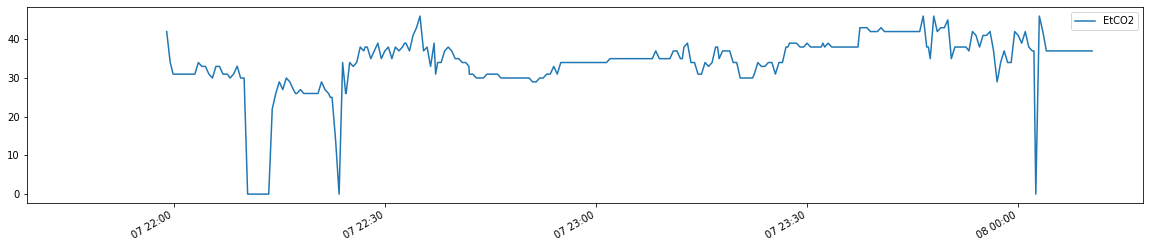

In [78]:
df.plot(figsize=(20,4))